# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"




# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + api_key


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_name = []
country = []
date = []
cloudiness = []
humidity = []
temp_max = []
wind_speed = []
lat = []
lon = []

count = 0
set = 1

#check openweather api parameters to append responses

for city in cities: 
    try:
        response = requests.get(url + "&q=" + city).json()
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        temp_max.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        if count > 49:
            count = 1
            set += 1
            city_name.append(city)
        else:
            count += 1
            city_name.append(city)
        print(f"Processing Record {count} of Set {set} | {city}")
    except:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")
        


Processing Record 1 of Set 1 | manjacaze
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | pontianak
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | fairbanks
Processing Record 8 of Set 1 | punta arenas
City not found. Skipping...
Processing Record 9 of Set 1 | alamosa
Processing Record 10 of Set 1 | port blair
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | sao filipe
Processing Record 15 of Set 1 | ustka
Processing Record 16 of Set 1 | los llanos de aridane
Processing Record 17 of Set 1 | palmas de monte alto
Processing Record 18 of Set 1 | esperance
Processing Record 19 of Set 1 | provideniya
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | cherskiy
Processing Record 22 of Set 1 | ostrovnoy
Processing Record 23 of Set 1 | 

Processing Record 37 of Set 4 | darbhanga
Processing Record 38 of Set 4 | mineiros
Processing Record 39 of Set 4 | linjiang
Processing Record 40 of Set 4 | simao
City not found. Skipping...
Processing Record 41 of Set 4 | faanui
City not found. Skipping...
Processing Record 42 of Set 4 | faya
Processing Record 43 of Set 4 | shubarshi
Processing Record 44 of Set 4 | meulaboh
Processing Record 45 of Set 4 | thompson
Processing Record 46 of Set 4 | salalah
Processing Record 47 of Set 4 | kavaratti
Processing Record 48 of Set 4 | kieta
Processing Record 49 of Set 4 | port macquarie
Processing Record 50 of Set 4 | port lincoln
Processing Record 1 of Set 5 | san patricio
Processing Record 2 of Set 5 | senador guiomard
Processing Record 3 of Set 5 | shirpur
Processing Record 4 of Set 5 | chabahar
Processing Record 5 of Set 5 | wajir
City not found. Skipping...
Processing Record 6 of Set 5 | kano
Processing Record 7 of Set 5 | nabire
Processing Record 8 of Set 5 | san ramon
Processing Record 9

Processing Record 26 of Set 8 | terra santa
Processing Record 27 of Set 8 | davila
Processing Record 28 of Set 8 | taoudenni
Processing Record 29 of Set 8 | nahuatzen
Processing Record 30 of Set 8 | tiznit
Processing Record 31 of Set 8 | buin
Processing Record 32 of Set 8 | avera
Processing Record 33 of Set 8 | vaitape
Processing Record 34 of Set 8 | kudahuvadhoo
Processing Record 35 of Set 8 | pangody
Processing Record 36 of Set 8 | rincon
Processing Record 37 of Set 8 | tymovskoye
Processing Record 38 of Set 8 | mokhsogollokh
Processing Record 39 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 40 of Set 8 | bonfim
Processing Record 41 of Set 8 | san antonio
City not found. Skipping...
Processing Record 42 of Set 8 | bandarbeyla
Processing Record 43 of Set 8 | phonhong
Processing Record 44 of Set 8 | batemans bay
Processing Record 45 of Set 8 | tvedestrand
Processing Record 46 of Set 8 | fukagawa
Processing Record 47 of Set 8 | fethiye
Processing Record 48 of Set 8 | luena
Proc

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather = {"City":city,"Cloudiness":cloudiness,"Country":country,"Date":date,"Lat":lat,"Lng":lon,
           "Humidity":humidity,"Max Temp.":temp_max,"Wind Speed": wind_speed}

weather_df=pd.DataFrame(weather)

weather_df.to_csv("weather_df.csv")

weather_df.count()

City          550
Cloudiness    550
Country       550
Date          550
Lat           550
Lng           550
Humidity      550
Max Temp.     550
Wind Speed    550
dtype: int64

In [6]:
weather_df.head()

,City,Cloudiness,Country,Date,Lat,Lng,Humidity,Max Temp.,Wind Speed
0,aleksandrov gay,0,MZ,1569693766,-24.71,33.88,95,64.79,4.27
1,aleksandrov gay,75,AR,1569693528,-54.81,-68.31,46,53.60,10.29
2,aleksandrov gay,98,ID,1569693766,-0.02,109.34,75,81.35,5.99
3,aleksandrov gay,40,MU,1569693447,-20.41,57.70,78,73.99,13.87
4,aleksandrov gay,95,ZA,1569693536,-33.59,26.89,90,66.00,4.25


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

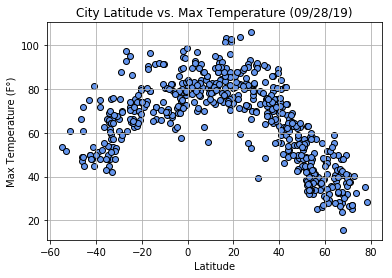

In [7]:
plt.scatter(weather_df['Lat'],weather_df['Max Temp.'],marker="o",color="cornflowerblue",edgecolor="black")
plt.grid()
plt.title("City Latitude vs. Max Temperature (09/28/19)")
plt.xlabel ("Latitude")
plt.ylabel ("Max Temperature (F°)")
plt.savefig("lat_temp.png")

#### Latitude vs. Humidity Plot

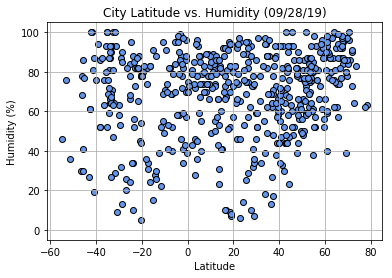

In [8]:
plt.scatter(weather_df['Lat'],weather_df['Humidity'],marker="o",color="cornflowerblue",edgecolor="black")
plt.grid()
plt.title("City Latitude vs. Humidity (09/28/19)")
plt.xlabel ("Latitude")
plt.ylabel ("Humidity (%)")
plt.ylim(-5,105)
plt.savefig("lat_humidity.png")

#### Latitude vs. Cloudiness Plot

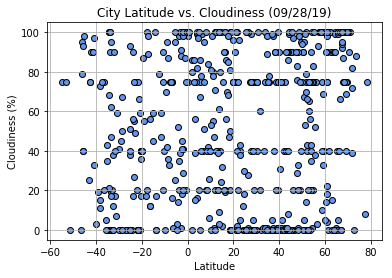

In [9]:
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'],marker="o",color="cornflowerblue",edgecolor="black")
plt.grid()
plt.title("City Latitude vs. Cloudiness (09/28/19)")
plt.xlabel ("Latitude")
plt.ylabel ("Cloudiness (%)")
plt.ylim(-5,105)
plt.savefig("lat_cloudiness.png")

#### Latitude vs. Wind Speed Plot

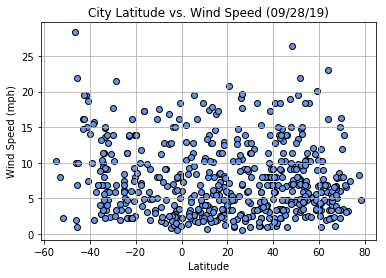

In [10]:
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'],marker="o",color="cornflowerblue",edgecolor="black")
plt.grid()
plt.title("City Latitude vs. Wind Speed (09/28/19)")
plt.xlabel ("Latitude")
plt.ylabel ("Wind Speed (mph)")
plt.savefig("lat_windspeed.png")